Thesis Topic: Brain MRI Image Classification Using Convolutonal Neural Network For Brain Tumor Detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.6 MB/s eta 0:00:00


Importing necessary libraries

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.python import metrics
import os
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Flatten,Dense
from tensorflow.keras.applications.vgg16 import VGG16
from glob import glob
from tensorflow.keras.models import Model 
from tensorflow.keras.applications import resnet
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import mobilenet_v2
import tensorflow_hub as hub
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array


count images of datase

In [ ]:
base_dir="/content/drive/MyDrive/datasetk"

In [ ]:


dir_path = r'/content/drive/MyDrive/datasetk/glioma'
count = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('glioma:', count)

dir_path = r'/content/drive/MyDrive/datasetk/meningioma'
count = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('meningioma:', count)

dir_path = r'/content/drive/MyDrive/datasetk/notumor'
count = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Not tumor:', count)

dir_path = r'/content/drive/MyDrive/datasetk/pituitary'
count = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('pituitary:', count)



glioma: 1621
meningioma: 1645
Not tumor: 2000
pituitary: 1757


Pre-processing the images of dataset using preprocessing module

In [ ]:
IMAGE_SIZE=224
BATCH_SIZE=64


train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    validation_split = 0.2
)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
    
    
)





Resizing the images and define the train and test dataset

In [ ]:
                                                                                                                                                                                        
    
)



Found 5619 images belonging to 4 classes.
Found 1404 images belonging to 4 classes.


In [ ]:
c = train_datagen.class_indices
classes = list(c.keys())
classes

['glioma', 'meningioma', 'notumor', 'pituitary']

build the model


In [ ]:
#custom built CNN model
model1 = tf.keras.Sequential()

model1.add(tf.keras.layers.Conv2D(filters = 64,padding = 'same', strides= 2,
                               kernel_size=3,activation = 'relu', input_shape = (224,224,3)))
model1.add(tf.keras.layers.Conv2D(filters = 64,padding = 'same', strides= 2,
                               kernel_size=3,activation = 'relu'))


model1.add(tf.keras.layers.Conv2D(filters = 64,padding = 'same', strides= 2,
                               kernel_size=3,activation = 'relu'))

model1.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides= 2))

model1.add(tf.keras.layers.Conv2D(filters = 64,padding = 'same', strides= 2,
                               kernel_size=3,activation = 'relu'))
model1.add(tf.keras.layers.Conv2D(filters = 128,padding = 'same', strides= 2,
                               kernel_size=3,activation = 'relu'))
model1.add(tf.keras.layers.Conv2D(filters = 128,padding = 'same', strides= 2,
                               kernel_size=3,activation = 'relu'))


model1.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides= 2))


model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(4, activation = 'softmax'))


model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 128)         73856     
                                                        

Training the Model

In [ ]:
model1.compile(optimizer='adam',loss=tf.losses.CategoricalCrossentropy(from_logits=False,
    label_smoothing=0.0),metrics = ['accuracy'])

In [ ]:
history1 = model1.fit(
    train_datagen,
    epochs=15,
    
    validation_data=test_datagen
)

Epoch 1/15
88/88 [==============================] - 287s 3s/step - loss: 1.0070 - accuracy: 0.5473 - val_loss: 0.7811 - val_accuracy: 0.7265
Epoch 2/15
88/88 [==============================] - 282s 3s/step - loss: 0.6166 - accuracy: 0.7617 - val_loss: 0.5648 - val_accuracy: 0.7657
Epoch 3/15
88/88 [==============================] - 286s 3s/step - loss: 0.5062 - accuracy: 0.8078 - val_loss: 0.5641 - val_accuracy: 0.7771
Epoch 4/15
88/88 [==============================] - 284s 3s/step - loss: 0.4086 - accuracy: 0.8491 - val_loss: 0.4911 - val_accuracy: 0.8162
Epoch 5/15
88/88 [==============================] - 287s 3s/step - loss: 0.3426 - accuracy: 0.8724 - val_loss: 0.3296 - val_accuracy: 0.8782
Epoch 6/15
88/88 [==============================] - 286s 3s/step - loss: 0.2901 - accuracy: 0.8922 - val_loss: 0.3236 - val_accuracy: 0.8754
Epoch 7/15
88/88 [==============================] - 288s 3s/step - loss: 0.2678 - accuracy: 0.9011 - val_loss: 0.3400 - val_accuracy: 0.8932
Epoch 8/15
88

Evoluate the model accuracy

In [ ]:

loss, accuracy = model1.evaluate(test_datagen)
print('Test accuracy:', accuracy)

22/22 [==============================] - 19s 849ms/step - loss: 0.2324 - accuracy: 0.9380
Test accuracy: 0.938034176826477


Save the model

In [ ]:
from tensorflow.keras.models import load_model
model1.save('/content/drive/MyDrive/saved model/cnn2.hdf5')

In [ ]:
import tensorflow as tf

new_model=tf.keras.models.load_model('/content/drive/MyDrive/saved model/cnn2.hdf5')
loss, accuracy = new_model.evaluate(test_datagen)
print('Test accuracy:', accuracy)



22/22 [==============================] - 22s 972ms/step - loss: 0.2324 - accuracy: 0.9380
Test accuracy: 0.938034176826477


In [ ]:
index = ['glioma','meningioma','normal','pituitary']

prediction


1/1 [==============================] - 0s 52ms/step
meningioma


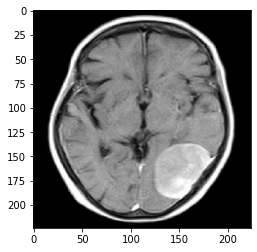

In [ ]:

img_pred = load_img("/content/drive/MyDrive/datasetk/meningioma/Te-meTr_0004.jpg" ,target_size=(224,224))
plt.imshow(img_pred)
img_pred = img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)
result1 = np.argmax(new_model.predict(img_pred/255.0),axis=1)
print(index[result1[0]])


#result=model1.predict(img_pred)

summarize history for model accuracy

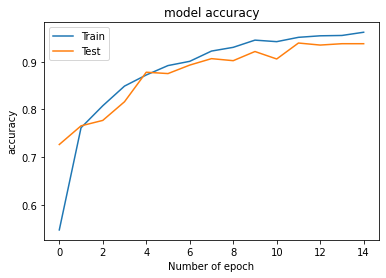

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Number of epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

summarize history for model loss

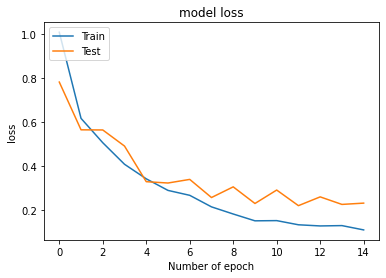

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Number of epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Confusion Matrix

In [ ]:
x_train,y_train=next(train_datagen)
x_test,y_test= next(test_datagen)

In [ ]:
y_val_predicted = model1.predict(x_test)
y_val = [np.argmax(i) for i in y_test]
y_predicted = [np.argmax(i) for i in y_val_predicted]


2/2 [==============================] - 1s 274ms/step


Text(51.0, 0.5, 'True ')

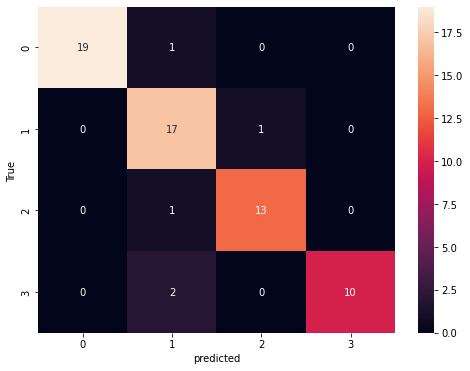

In [ ]:
cm = tf.math.confusion_matrix(y_val, y_predicted)
plt.figure(figsize=(8,6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('True ')

Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_val,y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.81      0.94      0.87        18
           2       0.93      0.93      0.93        14
           3       1.00      0.83      0.91        12

    accuracy                           0.92        64
   macro avg       0.93      0.91      0.92        64
weighted avg       0.93      0.92      0.92        64



Pre-traind Model

MobileNet V2 Mode

In [ ]:
IMAGE_SIZE=[224,224]
mobilenet = tf.keras.applications.MobileNetV2(input_shape= IMAGE_SIZE+[3],weights='imagenet', include_top=False)

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
for layer in mobilenet.layers:
  layer.trainable=False

In [ ]:
folder=glob('/content/drive/MyDrive/datasetk/*')
print(len(folder))

4


In [ ]:
x=Flatten()(mobilenet.output)
prediction=Dense(len(folder),activation='softmax')(x)
model3=Model(inputs=mobilenet.input,outputs=prediction)
model3.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [ ]:
model3.compile(optimizer='adam',loss=tf.losses.CategoricalCrossentropy(from_logits=False,
    label_smoothing=0.0),metrics = ['accuracy'])

In [ ]:
history3= model3.fit(
    train_datagen,
    epochs=15,
    validation_data=test_datagen
    
    )

Epoch 1/15
88/88 [==============================] - 380s 4s/step - loss: 1.6731 - accuracy: 0.8245 - val_loss: 1.8650 - val_accuracy: 0.8134
Epoch 2/15
88/88 [==============================] - 376s 4s/step - loss: 0.5438 - accuracy: 0.9199 - val_loss: 1.5527 - val_accuracy: 0.8533
Epoch 3/15
88/88 [==============================] - 375s 4s/step - loss: 0.2819 - accuracy: 0.9470 - val_loss: 1.2412 - val_accuracy: 0.8711
Epoch 4/15
88/88 [==============================] - 378s 4s/step - loss: 0.3141 - accuracy: 0.9495 - val_loss: 0.8655 - val_accuracy: 0.9117
Epoch 5/15
88/88 [==============================] - 379s 4s/step - loss: 0.2874 - accuracy: 0.9552 - val_loss: 0.5802 - val_accuracy: 0.9323
Epoch 6/15
88/88 [==============================] - 379s 4s/step - loss: 0.1589 - accuracy: 0.9724 - val_loss: 0.7563 - val_accuracy: 0.9138
Epoch 7/15
88/88 [==============================] - 357s 4s/step - loss: 0.2570 - accuracy: 0.9626 - val_loss: 0.6160 - val_accuracy: 0.9316
Epoch 8/15
88

In [ ]:
from tensorflow.keras.models import load_model
model3.save('/content/drive/MyDrive/saved model/mobilenet1.hdf5')

In [ ]:

loss, accuracy = model3.evaluate(test_datagen)
print('Test accuracy:', accuracy)

22/22 [==============================] - 62s 3s/step - loss: 0.6539 - accuracy: 0.9466
Test accuracy: 0.9465811848640442


In [ ]:
import tensorflow as tf

new_model2=tf.keras.models.load_model('/content/drive/MyDrive/saved model/mobilenet1.hdf5')
loss, accuracy = new_model2.evaluate(test_datagen)
print('Test accuracy:', accuracy)

22/22 [==============================] - 61s 3s/step - loss: 0.6539 - accuracy: 0.9466
Test accuracy: 0.9465811848640442


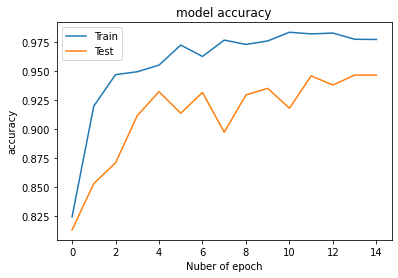

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Nuber of epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

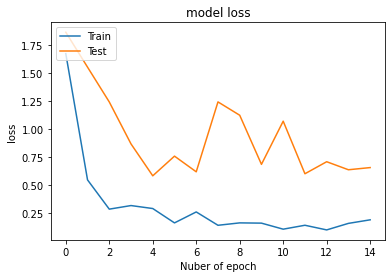

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Nuber of epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
x_train,y_train=next(train_datagen)
x_test,y_test= next(test_datagen)

In [ ]:
y_val_predicted = model3.predict(x_test)
y_val = [np.argmax(i) for i in y_test]
y_predicted = [np.argmax(i) for i in y_val_predicted]


2/2 [==============================] - 3s 1s/step


Text(51.0, 0.5, 'True')

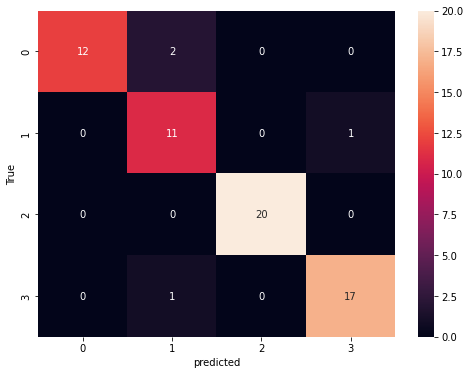

In [ ]:
cm = tf.math.confusion_matrix(y_val, y_predicted)
plt.figure(figsize=(8,6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('True')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_val,y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.79      0.92      0.85        12
           2       1.00      1.00      1.00        20
           3       0.94      0.94      0.94        18

    accuracy                           0.94        64
   macro avg       0.93      0.93      0.93        64
weighted avg       0.94      0.94      0.94        64



ResNet50 Model

In [ ]:

IMAGE_SIZE=[224,224]
Resnet=VGG16model = tf.keras.applications.ResNet50(input_shape= IMAGE_SIZE+[3], weights='imagenet',include_top=False)
Resnet.output

94765736/94765736 [==============================] - 1s 0us/step


<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [ ]:
for layer in Resnet.layers:
  layer.trainable=False

In [ ]:
folder=glob('/content/drive/MyDrive/datasetk/*')
print(len(folder))

4


In [ ]:
x=Flatten()(Resnet.output)
prediction=Dense(len(folder),activation='softmax')(x)
model4=Model(inputs=Resnet.input,outputs=prediction)
model4.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
model4.compile(optimizer='adam',loss=tf.losses.CategoricalCrossentropy(from_logits=False,
    label_smoothing=0.0),metrics = ['accuracy'])

In [ ]:
history4= model4.fit(
    train_datagen,
    epochs=15,
    validation_data=test_datagen
    
    )

Epoch 1/15
88/88 [==============================] - 1596s 18s/step - loss: 1.7734 - accuracy: 0.5524 - val_loss: 1.0641 - val_accuracy: 0.6090
Epoch 2/15
88/88 [==============================] - 1353s 15s/step - loss: 0.8337 - accuracy: 0.6676 - val_loss: 1.1542 - val_accuracy: 0.6360
Epoch 3/15
88/88 [==============================] - 1346s 15s/step - loss: 0.8310 - accuracy: 0.6782 - val_loss: 0.9916 - val_accuracy: 0.6802
Epoch 4/15
88/88 [==============================] - 1346s 15s/step - loss: 0.8277 - accuracy: 0.6866 - val_loss: 0.9345 - val_accuracy: 0.6695
Epoch 5/15
88/88 [==============================] - 1356s 15s/step - loss: 0.6679 - accuracy: 0.7382 - val_loss: 0.7987 - val_accuracy: 0.6802
Epoch 6/15
88/88 [==============================] - 1352s 15s/step - loss: 0.6414 - accuracy: 0.7459 - val_loss: 0.6473 - val_accuracy: 0.7657
Epoch 7/15
88/88 [==============================] - 1352s 15s/step - loss: 0.7326 - accuracy: 0.7211 - val_loss: 0.7885 - val_accuracy: 0.7407

In [ ]:
from tensorflow.keras.models import load_model
model4.save('/content/drive/MyDrive/saved model/resnet1.hdf5')

In [ ]:
import tensorflow as tf

new_model3=tf.keras.models.load_model('/content/drive/MyDrive/saved model/resnet1.hdf5')
loss, accuracy = new_model3.evaluate(test_datagen)
print('Test accuracy:', accuracy)

22/22 [==============================] - 262s 12s/step - loss: 0.7953 - accuracy: 0.7386
Test accuracy: 0.7386040091514587


In [ ]:
loss, accuracy = model4.evaluate(test_datagen)
print('Test accuracy:', accuracy)

22/22 [==============================] - 261s 12s/step - loss: 0.7953 - accuracy: 0.7386
Test accuracy: 0.7386040091514587


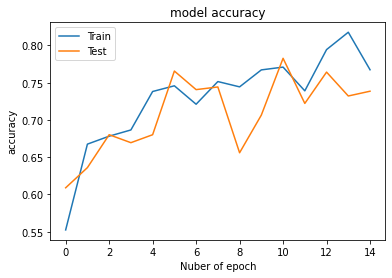

In [ ]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Nuber of epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

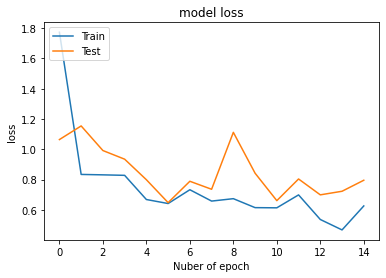

In [ ]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Nuber of epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
x_train,y_train=next(train_datagen)
x_test,y_test= next(test_datagen)

In [ ]:
y_val_predicted = model4.predict(x_test)
y_val = [np.argmax(i) for i in y_test]
y_predicted = [np.argmax(i) for i in y_val_predicted]


2/2 [==============================] - 12s 5s/step


Text(51.0, 0.5, 'True ')

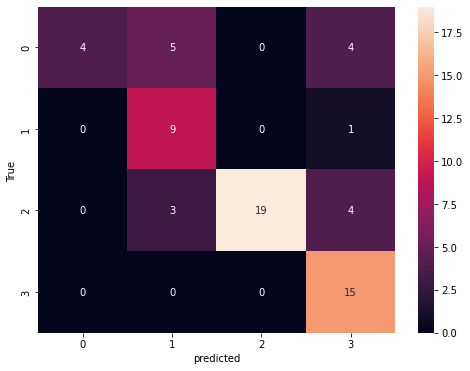

In [ ]:
cm = tf.math.confusion_matrix(y_val, y_predicted)
plt.figure(figsize=(8,6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('True ')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_val,y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.31      0.47        13
           1       0.53      0.90      0.67        10
           2       1.00      0.73      0.84        26
           3       0.62      1.00      0.77        15

    accuracy                           0.73        64
   macro avg       0.79      0.73      0.69        64
weighted avg       0.84      0.73      0.72        64



Comparision

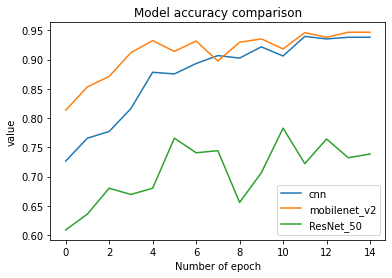

In [ ]:
plt.plot(history1.history['val_accuracy'])

plt.plot(history3.history['val_accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model accuracy comparison')
plt.xlabel('Number of epoch')
plt.ylabel('value')
plt.legend(['cnn', 'mobilenet_v2', 'ResNet_50'], loc='lower right')
plt.show()

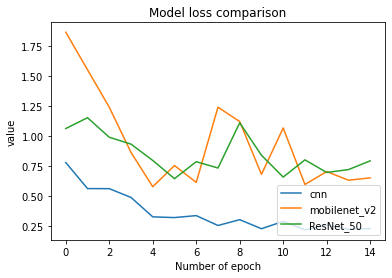

In [ ]:
plt.plot(history1.history['val_loss'])

plt.plot(history3.history['val_loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss comparison')
plt.xlabel('Number of epoch')
plt.ylabel('value')
plt.legend(['cnn', 'mobilenet_v2', 'ResNet_50'], loc='lower right')
plt.show()

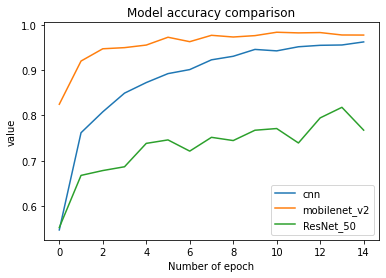

In [ ]:
plt.plot(history1.history['accuracy'])

plt.plot(history3.history['accuracy'])
plt.plot(history4.history['accuracy'])
plt.title('Model accuracy comparison')
plt.xlabel('Number of epoch')
plt.ylabel('value')
plt.legend(['cnn', 'mobilenet_v2', 'ResNet_50'], loc='lower right')
plt.show()

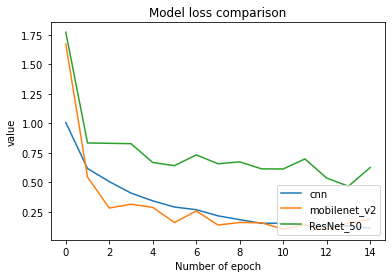

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history3.history['loss'])
plt.plot(history4.history['loss'])
plt.title('Model loss comparison')
plt.xlabel('Number of epoch')
plt.ylabel('value')
plt.legend(['cnn', 'mobilenet_v2', 'ResNet_50'], loc='lower right')
plt.show()